In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


from mplsoccer import Sbopen

# instantiate a parser object
parser = Sbopen()

## Extracting all LaLiga matches

In [2]:
df_competition = parser.competition()
df_laliga_rows = df_competition[df_competition['competition_id'] == 11]

df_laliga_matches = pd.DataFrame()

# Function to fetch matches based on 'competition_id' and 'season_id' values
def fetch_matches(row):
    competition_id = row['competition_id']
    season_id = row['season_id']
    # Your logic or function based on 'competition_id' and 'season_id' values
    df_match = parser.match(competition_id=competition_id, season_id=season_id)
    return df_match

# Iterate through the rows and fetch matches
for index, row in df_laliga_rows.iterrows():
    matches = fetch_matches(row)
    # Append the matches to df_championsLeague_matches
    df_laliga_matches = df_laliga_matches.append(matches, ignore_index=True)

/var/folders/dq/pg0mssxn6yzdwtcdrwnt0bs80000gn/T/ipykernel_24196/684102773.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_laliga_matches = df_laliga_matches.append(matches, ignore_index=True)
/var/folders/dq/pg0mssxn6yzdwtcdrwnt0bs80000gn/T/ipykernel_24196/684102773.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_laliga_matches = df_laliga_matches.append(matches, ignore_index=True)
/var/folders/dq/pg0mssxn6yzdwtcdrwnt0bs80000gn/T/ipykernel_24196/684102773.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_laliga_matches = df_laliga_matches.append(matches, ignore_index=True)
/var/folders/dq/pg0mssxn6yzdwtcdrwnt0bs80000gn/T/ipykernel_24196/684102773.py:18: FutureWarning: The frame.append method is deprec

In [3]:
df_laliga_matches[['home_score','away_score','home_team_name','away_team_name']]

,home_score,away_score,home_team_name,away_team_name
0,1,2,Barcelona,Celta Vigo
1,2,3,Real Betis,Barcelona
2,0,2,Osasuna,Barcelona
3,2,1,Real Madrid,Barcelona
4,1,0,Barcelona,Levante UD
...,...,...,...,...
515,2,0,Barcelona,Albacete
516,2,1,Barcelona,Levante UD
517,1,2,Albacete,Barcelona
518,2,0,Barcelona,Getafe


Since all the matches are of Barcelona, this analysis is only for team "Barcelona"

## Season-Wise Analysis

Steps:
1. Group by season, find home matches for each season, find away matches for all season
2. Find total goals scored per season vs total goals conceded each season
3. Total wins per season
4. Total losses per season
5. Total draws per season
6. Manager's performance

In [4]:
team = "Barcelona"

### Finding goals scored in total for home and away games and then combining the total goals scored for each season

In [150]:
df_home_matches = df_laliga_matches[df_laliga_matches['home_team_name'] == team]

In [151]:
df_away_matches = df_laliga_matches[df_laliga_matches['away_team_name'] == team]

In [7]:
grouped_data_home = df_home_matches.groupby("season_id")
grouped_data_away = df_away_matches.groupby("season_id")


In [8]:
sum_goalsScored_home = grouped_data_home['home_score'].sum()


In [9]:
sum_goalsScored_away = grouped_data_away['away_score'].sum()

In [10]:
total_goalsScored_season = sum_goalsScored_home + sum_goalsScored_away

In [11]:
total_goalsScored_season

season_id
1      93
2     104
4      82
21     93
22     86
23    111
24     98
25     80
26    110
27     98
37     16
38     43
39     55
40     61
41     94
42     72
90     81
dtype: int64

In [12]:
scored_series = pd.Series(total_goalsScored_season,name="total scored goals")
#Convert the series to a DataFrame
df_scored_goals = scored_series.reset_index()
# Rename the columns
df_scored_goals.columns = ['season_id', 'total scored goals']
df_scored_goals

,season_id,total scored goals
0,1,93
1,2,104
2,4,82
3,21,93
4,22,86
5,23,111
6,24,98
7,25,80
8,26,110
9,27,98


### finding goals conceded in total for home and away games and then combining total goals conceded for each season

In [13]:
sum_goalsConceded_home = grouped_data_home['away_score'].sum()
sum_goalsConceded_away = grouped_data_away['home_score'].sum()
total_goalsConceded_season = sum_goalsConceded_home + sum_goalsConceded_away

In [14]:
total_goalsConceded_season

season_id
1     24
2     32
4     31
21    23
22    18
23    28
24    38
25    28
26    21
27    24
37     2
38    12
39    24
40    32
41    29
42    31
90    37
dtype: int64

In [15]:
conceded_series = pd.Series(total_goalsConceded_season,name="total conceded goals")
#Convert the series to a DataFrame
df_conceded_goals = conceded_series.reset_index()
# Rename the columns
df_conceded_goals.columns = ['season_id', 'total conceded goals']
df_conceded_goals

,season_id,total conceded goals
0,1,24
1,2,32
2,4,31
3,21,23
4,22,18
5,23,28
6,24,38
7,25,28
8,26,21
9,27,24


### creating bar chart of goals scored vs goals conceded for each season

In [21]:
df_goals = df_laliga_matches

In [22]:
df_total_goals = pd.DataFrame()

In [23]:
df_total_goals = df_scored_goals.merge(df_conceded_goals,on='season_id', how='left')


In [24]:
df_total_goals

,season_id,total scored goals,total conceded goals
0,1,93,24
1,2,104,32
2,4,82,31
3,21,93,23
4,22,86,18
5,23,111,28
6,24,98,38
7,25,80,28
8,26,110,21
9,27,98,24


In [25]:

# Create a mapping dictionary of 'season_id' to 'season_name' from df_goals for the rows in df_total_goals
mapping = {row['season_id']: row['season_name'] for _, row in df_goals.iterrows() if row['season_id'] in df_total_goals['season_id'].values}

# Add the 'season_name' column to df_total_goals based on the mapping
df_total_goals['season_name'] = df_total_goals['season_id'].map(mapping)


In [26]:
df_total_goals

,season_id,total scored goals,total conceded goals,season_name
0,1,93,24,2017/2018
1,2,104,32,2016/2017
2,4,82,31,2018/2019
3,21,93,23,2009/2010
4,22,86,18,2010/2011
5,23,111,28,2011/2012
6,24,98,38,2012/2013
7,25,80,28,2013/2014
8,26,110,21,2014/2015
9,27,98,24,2015/2016


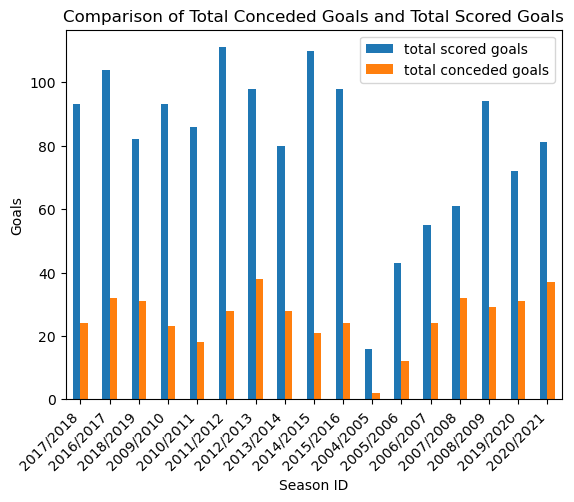

In [186]:
# Create a bar plot
ax = df_total_goals.plot(x='season_name', y=['total scored goals', 'total conceded goals'], kind='bar', rot=0)

# Set plot labels and title
ax.set_xlabel('Season ID')
ax.set_ylabel('Goals')
ax.set_title('Comparison of Total Conceded Goals and Total Scored Goals')

# Adjust x-axis label rotation
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


# Show the plot
plt.show()

### finding total wins vs total losses for each season

In [35]:

#Filter the DataFrame to include only the rows where the home team wins
df_home_matches['home wins each season'] = df_home_matches['home_score'] > df_home_matches['away_score']

# Group the home wins by season ID and calculate the number of home wins for each season
home_wins_per_season = df_home_matches.groupby('season_id')['home wins each season'].sum()

# Merge the calculated home wins per season back to the original DataFrame
df_home_matches = df_home_matches.merge(home_wins_per_season, on='season_id', how='left')

# Rename the column
df_home_matches.rename(columns={'home wins each season_y': 'home wins each season'}, inplace=True)


/var/folders/dq/pg0mssxn6yzdwtcdrwnt0bs80000gn/T/ipykernel_24196/3531861710.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_home_matches['home wins each season'] = df_home_matches['home_score'] > df_home_matches['away_score']


In [36]:
#Filter the DataFrame to include only the rows where the home team wins
df_away_matches['away wins each season'] = df_away_matches['home_score'] < df_away_matches['away_score']

# Group the home wins by season ID and calculate the number of home wins for each season
away_wins_per_season = df_away_matches.groupby('season_id')['away wins each season'].sum()

# Merge the calculated home wins per season back to the original DataFrame
df_away_matches = df_away_matches.merge(away_wins_per_season, on='season_id', how='left')

# Rename the column
df_away_matches.rename(columns={'away wins each season_y': 'away wins each season'}, inplace=True)

/var/folders/dq/pg0mssxn6yzdwtcdrwnt0bs80000gn/T/ipykernel_24196/592665768.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_away_matches['away wins each season'] = df_away_matches['home_score'] < df_away_matches['away_score']


In [38]:
wins_home = df_home_matches[['season_id','season_name','home wins each season']]

In [39]:
wins_away = df_away_matches[['season_id','season_name','away wins each season']]

In [43]:
df_total_wins = pd.DataFrame()


In [44]:
wins_home

,season_id,season_name,home wins each season
0,90,2020/2021,11
1,90,2020/2021,11
2,90,2020/2021,11
3,90,2020/2021,11
4,90,2020/2021,11
...,...,...,...
257,37,2004/2005,5
258,37,2004/2005,5
259,37,2004/2005,5
260,37,2004/2005,5


In [51]:
unique_pairs_home_wins = wins_home[['season_name', 'home wins each season']].drop_duplicates()
unique_pairs_home_wins.reset_index(inplace=True)

In [54]:
unique_pairs_away_wins = wins_away[['season_name', 'away wins each season']].drop_duplicates()
unique_pairs_away_wins.reset_index(inplace=True)

In [60]:
# Remove the 'index' column from the DataFrame
unique_pairs_home_wins = unique_pairs_home_wins.drop('index', axis=1)


,season_name,home wins each season
0,2020/2021,11
1,2019/2020,14
2,2018/2019,14
3,2017/2018,16
4,2016/2017,15
5,2015/2016,13
6,2014/2015,16
7,2013/2014,12
8,2012/2013,14
9,2011/2012,16


In [61]:
unique_pairs_away_wins = unique_pairs_away_wins.drop('index', axis=1)


,season_name,away wins each season
0,2020/2021,11
1,2019/2020,8
2,2018/2019,10
3,2017/2018,11
4,2016/2017,11
5,2015/2016,12
6,2014/2015,14
7,2013/2014,9
8,2012/2013,12
9,2011/2012,11


In [62]:
df_total_wins = unique_pairs_home_wins.merge(unique_pairs_away_wins,on='season_name', how='left')


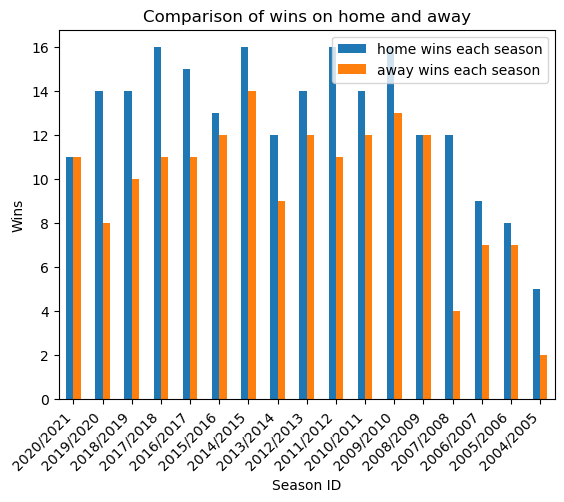

In [64]:
# Create a bar plot
ax = df_total_wins.plot(x='season_name', y=['home wins each season', 'away wins each season'], kind='bar', rot=0)

# Set plot labels and title
ax.set_xlabel('Season ID')
ax.set_ylabel('Wins')
ax.set_title('Comparison of wins on home and away')

# Adjust x-axis label rotation
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Show the plot
plt.show()

In [66]:

#Filter the DataFrame to include only the rows where the home team wins
df_home_matches['home losses each season'] = df_home_matches['home_score'] < df_home_matches['away_score']

# Group the home wins by season ID and calculate the number of home wins for each season
home_losses_per_season = df_home_matches.groupby('season_id')['home losses each season'].sum()

# Merge the calculated home wins per season back to the original DataFrame
df_home_matches = df_home_matches.merge(home_losses_per_season, on='season_id', how='left')

# Rename the column
df_home_matches.rename(columns={'home losses each season_y': 'home losses each season'}, inplace=True)

In [67]:
#Filter the DataFrame to include only the rows where the home team wins
df_away_matches['away losses each season'] = df_away_matches['home_score'] > df_away_matches['away_score']

# Group the home wins by season ID and calculate the number of home wins for each season
away_losses_per_season = df_away_matches.groupby('season_id')['away losses each season'].sum()

# Merge the calculated home wins per season back to the original DataFrame
df_away_matches = df_away_matches.merge(away_losses_per_season, on='season_id', how='left')

# Rename the column
df_away_matches.rename(columns={'away losses each season_y': 'away losses each season'}, inplace=True)

In [68]:
losses_home = df_home_matches[['season_id','season_name','home losses each season']]
losses_away = df_away_matches[['season_id','season_name','away losses each season']]

In [69]:
unique_pairs_home_losses = losses_home[['season_name', 'home losses each season']].drop_duplicates()
unique_pairs_home_losses.reset_index(inplace=True)

In [70]:
unique_pairs_away_losses = losses_away[['season_name', 'away losses each season']].drop_duplicates()
unique_pairs_away_losses.reset_index(inplace=True)

In [71]:
unique_pairs_home_losses = unique_pairs_home_losses.drop('index', axis=1)
unique_pairs_away_losses = unique_pairs_away_losses.drop('index', axis=1)

In [72]:
df_total_losses = unique_pairs_home_losses.merge(unique_pairs_away_losses,on='season_name', how='left')


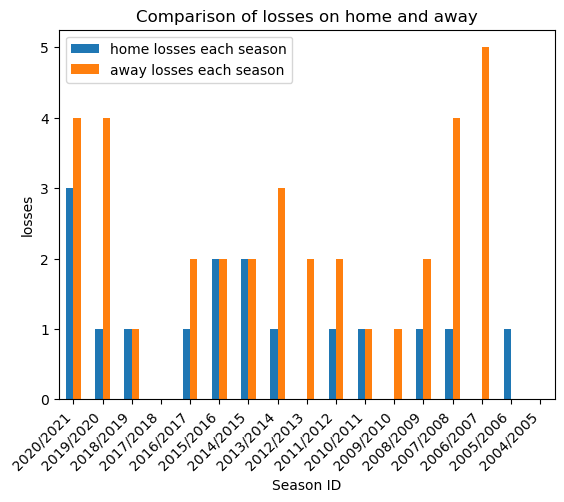

In [73]:
# Create a bar plot
ax = df_total_losses.plot(x='season_name', y=['home losses each season', 'away losses each season'], kind='bar', rot=0)

# Set plot labels and title
ax.set_xlabel('Season ID')
ax.set_ylabel('losses')
ax.set_title('Comparison of losses on home and away')

# Adjust x-axis label rotation
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Show the plot
plt.show()

In [75]:
df_total_wins['total_wins'] = df_total_wins['home wins each season'] + df_total_wins['away wins each season']

In [77]:
df_total_losses['total_losses'] = df_total_losses['home losses each season'] + df_total_losses['away losses each season']

In [78]:
df_wins_losses = df_total_wins.merge(df_total_losses,on='season_name', how='left')

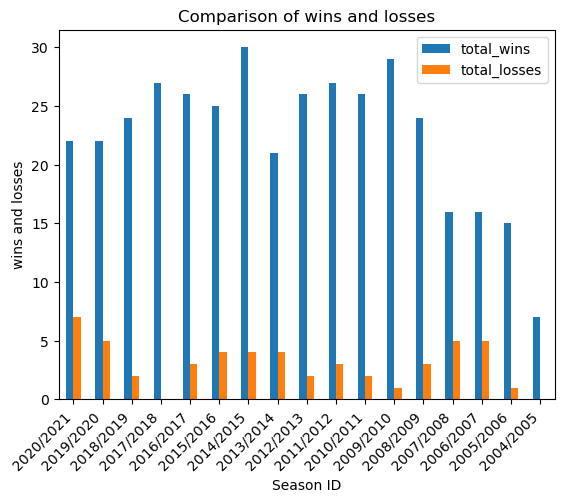

In [81]:
# Create a bar plot
ax = df_wins_losses.plot(x='season_name', y=['total_wins', 'total_losses'], kind='bar', rot=0)

# Set plot labels and title
ax.set_xlabel('Season ID')
ax.set_ylabel('wins and losses')
ax.set_title('Comparison of wins and losses')

# Adjust x-axis label rotation
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Show the plot
plt.show()

### Adding total draws for each season too

In [83]:
#Filter the DataFrame to include only the rows where the home team wins
df_home_matches['home draws each season'] = df_home_matches['home_score'] == df_home_matches['away_score']

# Group the home wins by season ID and calculate the number of home wins for each season
home_draws_per_season = df_home_matches.groupby('season_id')['home draws each season'].sum()

# Merge the calculated home wins per season back to the original DataFrame
df_home_matches = df_home_matches.merge(home_draws_per_season, on='season_id', how='left')

# Rename the column
df_home_matches.rename(columns={'home draws each season_y': 'home draws each season'}, inplace=True)


In [84]:
#Filter the DataFrame to include only the rows where the home team wins
df_away_matches['away draws each season'] = df_away_matches['home_score'] == df_away_matches['away_score']

# Group the home wins by season ID and calculate the number of home wins for each season
away_draws_per_season = df_away_matches.groupby('season_id')['away draws each season'].sum()

# Merge the calculated home wins per season back to the original DataFrame
df_away_matches = df_away_matches.merge(away_draws_per_season, on='season_id', how='left')

# Rename the column
df_away_matches.rename(columns={'away draws each season_y': 'away draws each season'}, inplace=True)

In [85]:
draws_home = df_home_matches[['season_id','season_name','home draws each season']]
draws_away = df_away_matches[['season_id','season_name','away draws each season']]

unique_pairs_home_draws = draws_home[['season_name', 'home draws each season']].drop_duplicates()
unique_pairs_home_draws.reset_index(inplace=True)
unique_pairs_home_draws = unique_pairs_home_draws.drop('index', axis=1)

unique_pairs_away_draws = draws_away[['season_name', 'away draws each season']].drop_duplicates()
unique_pairs_away_draws.reset_index(inplace=True)
unique_pairs_away_draws = unique_pairs_away_draws.drop('index', axis=1)


In [86]:
df_total_draws = unique_pairs_home_draws.merge(unique_pairs_away_draws,on='season_name', how='left')

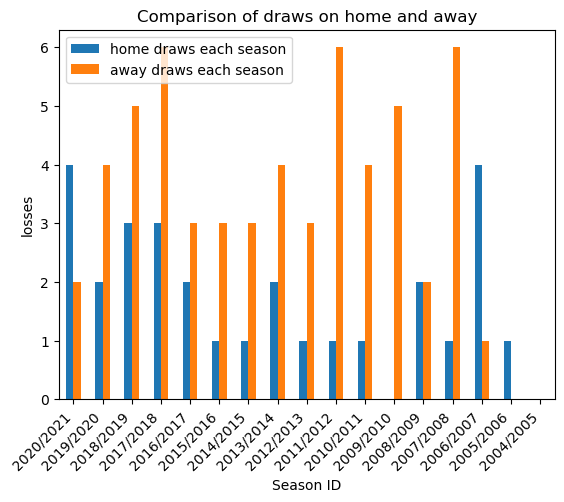

In [88]:
# Create a bar plot
ax = df_total_draws.plot(x='season_name', y=['home draws each season', 'away draws each season'], kind='bar', rot=0)

# Set plot labels and title
ax.set_xlabel('Season ID')
ax.set_ylabel('losses')
ax.set_title('Comparison of draws on home and away')

# Adjust x-axis label rotation
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Show the plot
plt.show()

In [90]:
df_total_draws['total_draws'] = df_total_draws['home draws each season'] + df_total_draws['away draws each season']

In [91]:
df_total_draws

,season_name,home draws each season,away draws each season,total_draws
0,2020/2021,4,2,6
1,2019/2020,2,4,6
2,2018/2019,3,5,8
3,2017/2018,3,6,9
4,2016/2017,2,3,5
5,2015/2016,1,3,4
6,2014/2015,1,3,4
7,2013/2014,2,4,6
8,2012/2013,1,3,4
9,2011/2012,1,6,7


In [92]:
df_wins_losses_draws = df_wins_losses.merge(df_total_draws,on='season_name', how='left')

In [93]:
df_wins_losses_draws

,season_name,home wins each season,away wins each season,total_wins,home losses each season,away losses each season,total_losses,home draws each season,away draws each season,total_draws
0,2020/2021,11,11,22,3,4,7,4,2,6
1,2019/2020,14,8,22,1,4,5,2,4,6
2,2018/2019,14,10,24,1,1,2,3,5,8
3,2017/2018,16,11,27,0,0,0,3,6,9
4,2016/2017,15,11,26,1,2,3,2,3,5
5,2015/2016,13,12,25,2,2,4,1,3,4
6,2014/2015,16,14,30,2,2,4,1,3,4
7,2013/2014,12,9,21,1,3,4,2,4,6
8,2012/2013,14,12,26,0,2,2,1,3,4
9,2011/2012,16,11,27,1,2,3,1,6,7


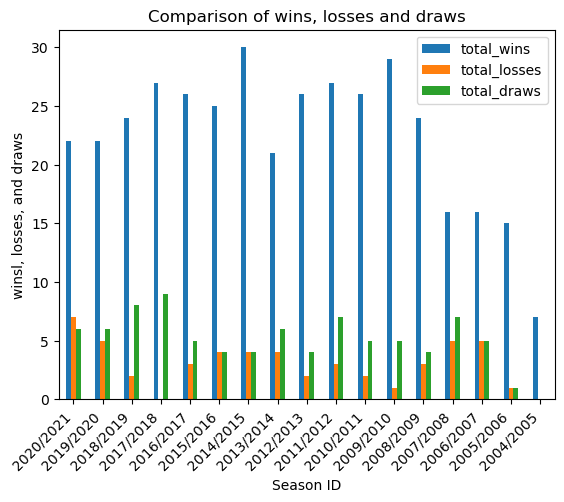

In [94]:
# Create a bar plot
ax = df_wins_losses_draws.plot(x='season_name', y=['total_wins', 'total_losses', 'total_draws'], kind='bar', rot=0)

# Set plot labels and title
ax.set_xlabel('Season ID')
ax.set_ylabel('winsl, losses, and draws')
ax.set_title('Comparison of wins, losses and draws')

# Adjust x-axis label rotation
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Show the plot
plt.show()

## Manager's performance

### Here we will find how managers have performed
1. Total games won
2. Total games lost
3. Total games draw
4. Winning ratio
5. Losing ratio


#### Total managers that Barcelona had from season 2004/2005 to 2020/2021

In [100]:
df_home_matches.columns

Index(['match_id', 'match_date', 'kick_off', 'home_score', 'away_score',
       'match_status', 'match_status_360', 'last_updated', 'last_updated_360',
       'match_week', 'competition_id', 'country_name', 'competition_name',
       'season_id', 'season_name', 'home_team_id', 'home_team_name',
       'home_team_gender', 'home_team_group', 'home_team_country_id',
       'home_team_country_name', 'home_team_managers_id',
       'home_team_managers_name', 'home_team_managers_nickname',
       'home_team_managers_dob', 'home_team_managers_country_id',
       'home_team_managers_country_name', 'away_team_id', 'away_team_name',
       'away_team_gender', 'away_team_group', 'away_team_country_id',
       'away_team_country_name', 'away_team_managers_id',
       'away_team_managers_name', 'away_team_managers_nickname',
       'away_team_managers_dob', 'away_team_managers_country_id',
       'away_team_managers_country_name', 'metadata_data_version',
       'metadata_shot_fidelity_version', 'm

In [105]:
df_home_matches['home_team_managers_name'].unique()

array(['Ronald Koeman', 'Enrique Setién Solar',
       'Ernesto Valverde Tejedor', 'Luis Enrique Martínez García', nan,
       'Gerardo Daniel Martino', 'Josep Guardiola i Sala',
       'Frank Rijkaard'], dtype=object)

#### finding total wins, total losses and total draws for each manager

1. Total wins

In [132]:

#Filter the DataFrame to include only the rows where the home team wins
df_home_matches['home wins each manager'] = df_home_matches['home_score'] > df_home_matches['away_score']

# Group the home wins by season ID and calculate the number of home wins for each season
home_wins_per_manager = df_home_matches.groupby('home_team_managers_name')['home wins each manager'].sum()

# Merge the calculated home wins per season back to the original DataFrame
df_home_matches = df_home_matches.merge(home_wins_per_manager, on='home_team_managers_name', how='left')

# Rename the column
df_home_matches.rename(columns={'home wins each manager_y': 'home wins each manager'}, inplace=True)

df_home_matches.rename(columns={'home_team_managers_name': 'managers_name'}, inplace=True)


/var/folders/dq/pg0mssxn6yzdwtcdrwnt0bs80000gn/T/ipykernel_24196/197174709.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_home_matches['home wins each manager'] = df_home_matches['home_score'] > df_home_matches['away_score']


In [133]:
#Filter the DataFrame to include only the rows where the home team wins
df_away_matches['away wins each manager'] = df_away_matches['home_score'] < df_away_matches['away_score']

# Group the home wins by season ID and calculate the number of home wins for each season
away_wins_per_manager = df_away_matches.groupby('away_team_managers_name')['away wins each manager'].sum()

# Merge the calculated home wins per season back to the original DataFrame
df_away_matches = df_away_matches.merge(away_wins_per_manager, on='away_team_managers_name', how='left')

# Rename the column
df_away_matches.rename(columns={'away wins each manager_y': 'away wins each manager'}, inplace=True)

df_away_matches.rename(columns={'away_team_managers_name': 'managers_name'}, inplace=True)


/var/folders/dq/pg0mssxn6yzdwtcdrwnt0bs80000gn/T/ipykernel_24196/897379021.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_away_matches['away wins each manager'] = df_away_matches['home_score'] < df_away_matches['away_score']


In [138]:
wins_home = df_home_matches[['managers_name','home wins each manager']]
wins_away = df_away_matches[['managers_name','away wins each manager']]

unique_pairs_home_wins = wins_home[['managers_name', 'home wins each manager']].drop_duplicates()
unique_pairs_home_wins.reset_index(inplace=True)
unique_pairs_home_wins = unique_pairs_home_wins.drop('index', axis=1)

unique_pairs_away_wins = wins_away[['managers_name', 'away wins each manager']].drop_duplicates()
unique_pairs_away_wins.reset_index(inplace=True)
unique_pairs_away_wins = unique_pairs_away_wins.drop('index', axis=1)


In [139]:
df_total_wins_manager = unique_pairs_home_wins.merge(unique_pairs_away_wins,on='managers_name', how='left')

In [142]:
df_total_wins_manager.dropna()

,managers_name,home wins each manager,away wins each manager
0,Ronald Koeman,11.0,11.0
1,Enrique Setién Solar,8.0,5.0
2,Ernesto Valverde Tejedor,36.0,24.0
3,Luis Enrique Martínez García,43.0,37.0
5,Gerardo Daniel Martino,11.0,9.0
6,Josep Guardiola i Sala,55.0,47.0
7,Frank Rijkaard,31.0,20.0


2. Total losses

In [146]:

#Filter the DataFrame to include only the rows where the home team wins
df_home_matches['home losses each manager'] = df_home_matches['home_score'] < df_home_matches['away_score']

# Group the home wins by season ID and calculate the number of home wins for each season
home_losses_per_manager = df_home_matches.groupby('home_team_managers_name')['home losses each manager'].sum()

# Merge the calculated home wins per season back to the original DataFrame
df_home_matches = df_home_matches.merge(home_losses_per_manager, on='home_team_managers_name', how='left')

# Rename the column
df_home_matches.rename(columns={'home losses each manager_y': 'home losses each manager'}, inplace=True)

df_home_matches.rename(columns={'home_team_managers_name': 'managers_name'}, inplace=True)

/var/folders/dq/pg0mssxn6yzdwtcdrwnt0bs80000gn/T/ipykernel_24196/2904284497.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_home_matches['home losses each manager'] = df_home_matches['home_score'] < df_home_matches['away_score']


In [147]:
#Filter the DataFrame to include only the rows where the home team wins
df_away_matches['away losses each manager'] = df_away_matches['home_score'] > df_away_matches['away_score']

# Group the home wins by season ID and calculate the number of home wins for each season
away_losses_per_manager = df_away_matches.groupby('away_team_managers_name')['away losses each manager'].sum()

# Merge the calculated home wins per season back to the original DataFrame
df_away_matches = df_away_matches.merge(away_losses_per_manager, on='away_team_managers_name', how='left')

# Rename the column
df_away_matches.rename(columns={'away losses each manager_y': 'away losses each manager'}, inplace=True)

df_away_matches.rename(columns={'away_team_managers_name': 'managers_name'}, inplace=True)


/var/folders/dq/pg0mssxn6yzdwtcdrwnt0bs80000gn/T/ipykernel_24196/601267745.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_away_matches['away losses each manager'] = df_away_matches['home_score'] > df_away_matches['away_score']


In [149]:
losses_home = df_home_matches[['managers_name','home losses each manager']]
losses_away = df_away_matches[['managers_name','away losses each manager']]

unique_pairs_home_losses = losses_home[['managers_name', 'home losses each manager']].drop_duplicates()
unique_pairs_home_losses.reset_index(inplace=True)
unique_pairs_home_losses = unique_pairs_home_losses.drop('index', axis=1)

unique_pairs_away_losses = losses_away[['managers_name', 'away losses each manager']].drop_duplicates()
unique_pairs_away_losses.reset_index(inplace=True)
unique_pairs_away_losses = unique_pairs_away_losses.drop('index', axis=1)

df_total_losses_manager = unique_pairs_home_losses.merge(unique_pairs_away_losses,on='managers_name', how='left')
df_total_losses_manager.dropna()

,managers_name,home losses each manager,away losses each manager
0,Ronald Koeman,3.0,4.0
1,Enrique Setién Solar,1.0,2.0
2,Ernesto Valverde Tejedor,1.0,3.0
3,Luis Enrique Martínez García,5.0,6.0
5,Gerardo Daniel Martino,1.0,3.0
6,Josep Guardiola i Sala,3.0,6.0
7,Frank Rijkaard,1.0,9.0


3. Total draws

In [152]:

#Filter the DataFrame to include only the rows where the home team wins
df_home_matches['home draws each manager'] = df_home_matches['home_score'] == df_home_matches['away_score']

# Group the home wins by season ID and calculate the number of home wins for each season
home_draws_per_manager = df_home_matches.groupby('home_team_managers_name')['home draws each manager'].sum()

# Merge the calculated home wins per season back to the original DataFrame
df_home_matches = df_home_matches.merge(home_draws_per_manager, on='home_team_managers_name', how='left')

# Rename the column
df_home_matches.rename(columns={'home draws each manager_y': 'home draws each manager'}, inplace=True)

df_home_matches.rename(columns={'home_team_managers_name': 'managers_name'}, inplace=True)

/var/folders/dq/pg0mssxn6yzdwtcdrwnt0bs80000gn/T/ipykernel_24196/2533321899.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_home_matches['home draws each manager'] = df_home_matches['home_score'] == df_home_matches['away_score']


In [153]:
#Filter the DataFrame to include only the rows where the home team wins
df_away_matches['away draws each manager'] = df_away_matches['home_score'] == df_away_matches['away_score']

# Group the home wins by season ID and calculate the number of home wins for each season
away_draws_per_manager = df_away_matches.groupby('away_team_managers_name')['away draws each manager'].sum()

# Merge the calculated home wins per season back to the original DataFrame
df_away_matches = df_away_matches.merge(away_draws_per_manager, on='away_team_managers_name', how='left')

# Rename the column
df_away_matches.rename(columns={'away draws each manager_y': 'away draws each manager'}, inplace=True)

df_away_matches.rename(columns={'away_team_managers_name': 'managers_name'}, inplace=True)

/var/folders/dq/pg0mssxn6yzdwtcdrwnt0bs80000gn/T/ipykernel_24196/2068015547.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_away_matches['away draws each manager'] = df_away_matches['home_score'] == df_away_matches['away_score']


In [154]:
draws_home = df_home_matches[['managers_name','home draws each manager']]
draws_away = df_away_matches[['managers_name','away draws each manager']]

unique_pairs_home_draws = draws_home[['managers_name', 'home draws each manager']].drop_duplicates()
unique_pairs_home_draws.reset_index(inplace=True)
unique_pairs_home_draws = unique_pairs_home_draws.drop('index', axis=1)

unique_pairs_away_draws = draws_away[['managers_name', 'away draws each manager']].drop_duplicates()
unique_pairs_away_draws.reset_index(inplace=True)
unique_pairs_away_draws = unique_pairs_away_draws.drop('index', axis=1)

df_total_draws_manager = unique_pairs_home_draws.merge(unique_pairs_away_draws,on='managers_name', how='left')
df_total_draws_manager.dropna()

,managers_name,home draws each manager,away draws each manager
0,Ronald Koeman,4.0,2.0
1,Enrique Setién Solar,1.0,2.0
2,Ernesto Valverde Tejedor,7.0,13.0
3,Luis Enrique Martínez García,4.0,9.0
5,Gerardo Daniel Martino,2.0,4.0
6,Josep Guardiola i Sala,4.0,17.0
7,Frank Rijkaard,5.0,7.0


In [155]:
df_total_draws_manager['total draws'] = df_total_draws_manager['home draws each manager'] + df_total_draws_manager['away draws each manager']

In [156]:
df_total_losses_manager['total losses'] = df_total_losses_manager['home losses each manager'] + df_total_losses_manager['away losses each manager']

In [157]:
df_total_wins_manager['total wins'] = df_total_wins_manager['home wins each manager'] + df_total_wins_manager['away wins each manager']

In [158]:
df_managers =  df_total_draws_manager.merge(df_total_losses_manager, on='managers_name', how='left')


In [159]:
df_managers = df_managers.merge(df_total_wins_manager, on='managers_name', how='left')

In [161]:
df_managers.dropna(inplace = True)

In [166]:
df_managers['total games'] = df_managers['total draws'] + df_managers['total wins'] + df_managers['total losses']

In [167]:
df_managers['wins percentage'] = df_managers['total wins'] / df_managers['total games']
df_managers['losses percentage'] = df_managers['total losses'] / df_managers['total games']
df_managers['draws percentage'] = df_managers['total draws'] / df_managers['total games']


In [171]:
df_managers['home wins percentage'] = df_managers['home wins each manager'] / (df_managers['home wins each manager'] + df_managers['away wins each manager']) 
df_managers['away wins percentage'] = df_managers['away wins each manager'] / (df_managers['home wins each manager'] + df_managers['away wins each manager']) 

df_managers['home losses percentage'] = df_managers['home losses each manager'] / (df_managers['home losses each manager'] + df_managers['away losses each manager']) 
df_managers['away losses percentage'] = df_managers['away losses each manager'] / (df_managers['home losses each manager'] + df_managers['away losses each manager']) 

df_managers['home draws percentage'] = df_managers['home draws each manager'] / (df_managers['home draws each manager'] + df_managers['away draws each manager']) 
df_managers['away draws percentage'] = df_managers['away draws each manager'] / (df_managers['home draws each manager'] + df_managers['away draws each manager']) 



In [172]:
df_managers

,managers_name,home draws each manager,away draws each manager,total draws,home losses each manager,away losses each manager,total losses,home wins each manager,away wins each manager,total wins,total games,wins percentage,losses percentage,draws percentage,home wins percentage,away wins percentage,home losses percentage,away losses percentage,home draws percentage,away draws percentage
0,Ronald Koeman,4.0,2.0,6.0,3.0,4.0,7.0,11.0,11.0,22.0,35.0,0.628571,0.200000,0.171429,0.500000,0.500000,0.428571,0.571429,0.666667,0.333333
1,Enrique Setién Solar,1.0,2.0,3.0,1.0,2.0,3.0,8.0,5.0,13.0,19.0,0.684211,0.157895,0.157895,0.615385,0.384615,0.333333,0.666667,0.333333,0.666667
2,Ernesto Valverde Tejedor,7.0,13.0,20.0,1.0,3.0,4.0,36.0,24.0,60.0,84.0,0.714286,0.047619,0.238095,0.600000,0.400000,0.250000,0.750000,0.350000,0.650000
3,Luis Enrique Martínez García,4.0,9.0,13.0,5.0,6.0,11.0,43.0,37.0,80.0,104.0,0.769231,0.105769,0.125000,0.537500,0.462500,0.454545,0.545455,0.307692,0.692308
5,Gerardo Daniel Martino,2.0,4.0,6.0,1.0,3.0,4.0,11.0,9.0,20.0,30.0,0.666667,0.133333,0.200000,0.550000,0.450000,0.250000,0.750000,0.333333,0.666667
6,Josep Guardiola i Sala,4.0,17.0,21.0,3.0,6.0,9.0,55.0,47.0,102.0,132.0,0.772727,0.068182,0.159091,0.539216,0.460784,0.333333,0.666667,0.190476,0.809524
7,Frank Rijkaard,5.0,7.0,12.0,1.0,9.0,10.0,31.0,20.0,51.0,73.0,0.698630,0.136986,0.164384,0.607843,0.392157,0.100000,0.900000,0.416667,0.583333


Visualization

1. Wins, draws and losses of each manager
2. percentage of wins, draws and losses of each manager
2. Home wins percentage, away wins percentage for each manager
3. Home losses percentage, away losses percentage for each manager
4. Home draws percentage, away draws percentage for each manager 

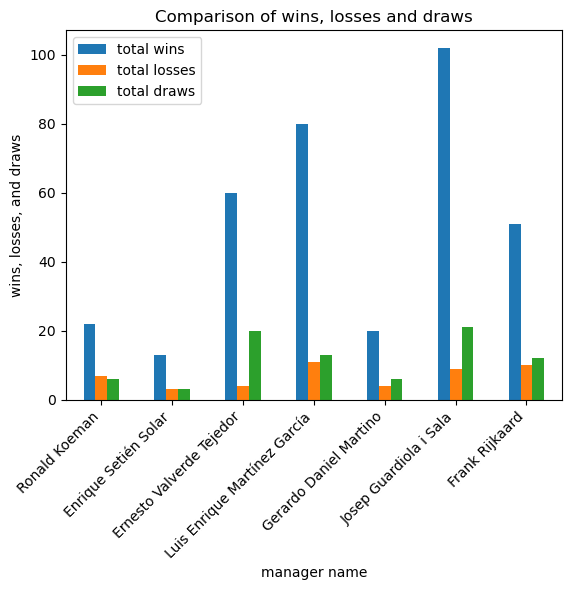

In [176]:
# Create a bar plot
ax = df_managers.plot(x='managers_name', y=['total wins', 'total losses', 'total draws'], kind='bar', rot=0)

# Set plot labels and title
ax.set_xlabel('manager name')
ax.set_ylabel('wins, losses, and draws')
ax.set_title('Comparison of wins, losses and draws')

# Adjust x-axis label rotation
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Show the plot
plt.show()

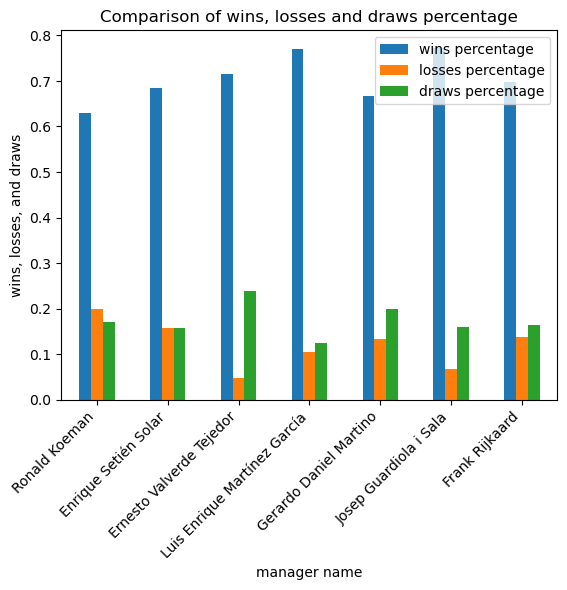

In [174]:
# Create a bar plot
ax = df_managers.plot(x='managers_name', y=['wins percentage', 'losses percentage', 'draws percentage'], kind='bar', rot=0)

# Set plot labels and title
ax.set_xlabel('manager name')
ax.set_ylabel('wins, losses, and draws')
ax.set_title('Comparison of wins, losses and draws percentage')

# Adjust x-axis label rotation
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Show the plot
plt.show()

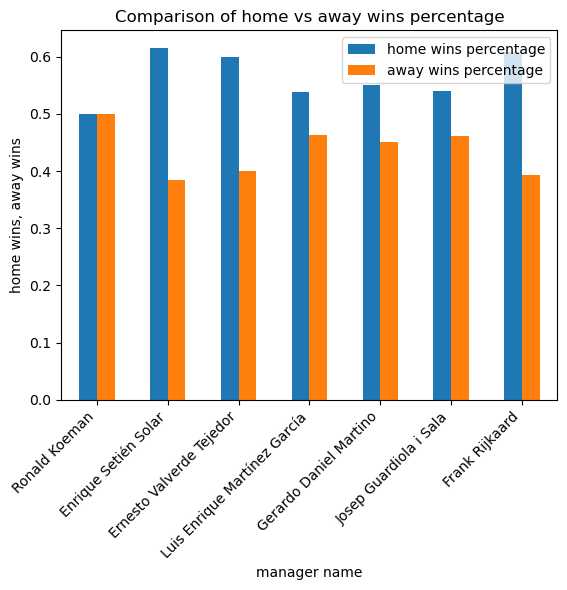

In [177]:
# Create a bar plot
ax = df_managers.plot(x='managers_name', y=['home wins percentage', 'away wins percentage'], kind='bar', rot=0)

# Set plot labels and title
ax.set_xlabel('manager name')
ax.set_ylabel('home wins, away wins')
ax.set_title('Comparison of home vs away wins percentage')

# Adjust x-axis label rotation
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Show the plot
plt.show()

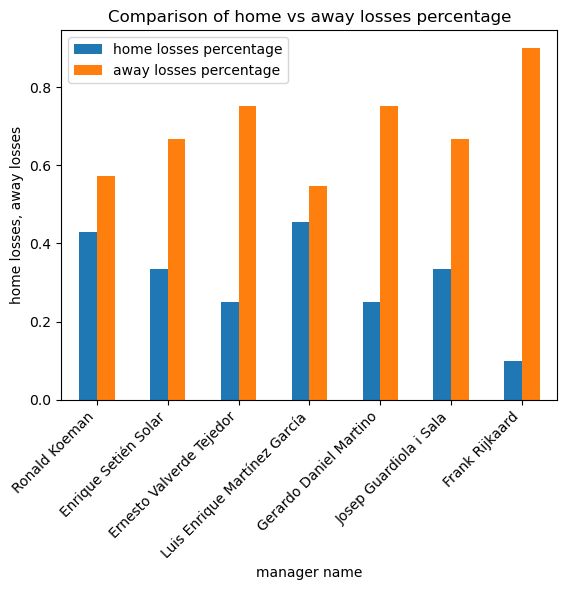

In [178]:
# Create a bar plot
ax = df_managers.plot(x='managers_name', y=['home losses percentage', 'away losses percentage'], kind='bar', rot=0)

# Set plot labels and title
ax.set_xlabel('manager name')
ax.set_ylabel('home losses, away losses')
ax.set_title('Comparison of home vs away losses percentage')

# Adjust x-axis label rotation
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Show the plot
plt.show()

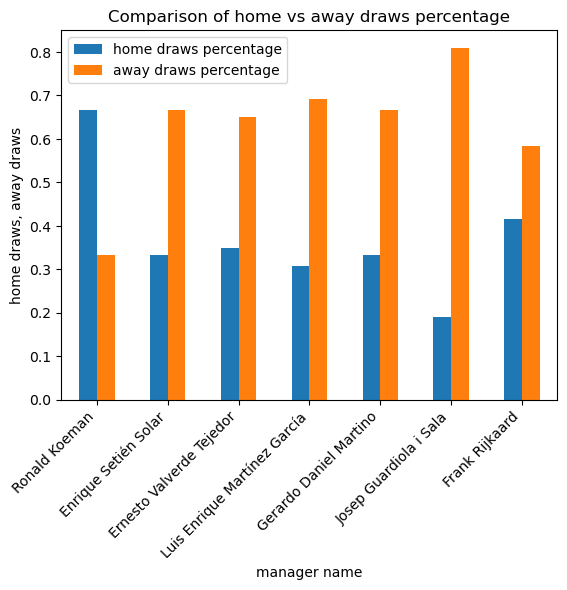

In [179]:
# Create a bar plot
ax = df_managers.plot(x='managers_name', y=['home draws percentage', 'away draws percentage'], kind='bar', rot=0)

# Set plot labels and title
ax.set_xlabel('manager name')
ax.set_ylabel('home draws, away draws')
ax.set_title('Comparison of home vs away draws percentage')

# Adjust x-axis label rotation
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Show the plot
plt.show()